<a href="https://colab.research.google.com/github/indhuv27/data-science-codsoft/blob/main/movie_rating_prediction_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
data = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [84]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [85]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [86]:
# find the shape of the dataset
data.shape

(15509, 10)

In [87]:
print("number of rows",data.shape[0])

number of rows 15509


In [88]:
print("number of columns",data.shape[1])

number of columns 10


In [89]:
# getting the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [90]:
# check the missing values
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [91]:
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


<Axes: >

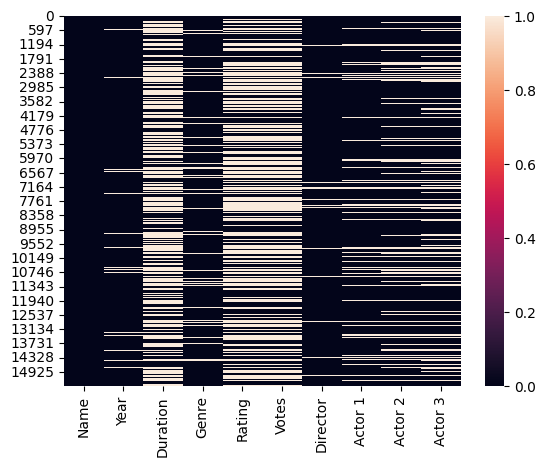

In [92]:
sns.heatmap(data.isnull())

In [93]:
per_missing = (data.isnull().sum() / len(data)) * 100
per_missing

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [94]:
# drop all missing values
data.dropna(inplace=True)

In [95]:
# check for missing values
data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [96]:
# check for duplicate values
dup_data = data.duplicated().any()

In [97]:
print("are there any duplicate value?",dup_data)

are there any duplicate value? False


In [98]:
data = data.drop_duplicates()

In [99]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [100]:
# getting overall statistical data
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Zindagi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [101]:
# diplaying title of the movie having runtime >= 180 minutes
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [102]:
data[data['Duration'] >= '180 min']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
18,10ml LOVE,(2010),87 min,"Comedy, Drama, Romance",6.3,162,Sharat Katariya,Neil Bhoopalam,Anusha Bose,Manu Rishi Chadha
36,19 Revolutions,(2004),94 min,Drama,4.5,16,Sridhar Reddy,Tarun Arora,Gulshan Grover,Vinay Pandey
50,2 Nights in Soul Valley,(2012),80 min,"Adventure, Horror, Mystery",6.8,21,Harish Sharma,Hemant Pandey,Sumeet Sharma,Sumeet Sharma
...,...,...,...,...,...,...,...,...,...,...
15228,Yeh Hai Bakrapur,(2014),95 min,"Comedy, Drama",3.6,233,Janaki Vishwanathan,Anshuman Jha,Suruchi Aulakh,Asif Basra
15229,Yeh Hai Chakkad Bakkad Bumbe Bo,(2003),90 min,Adventure,6.6,9,Sridhar Rangayan,Tom Alter,Mona Ambegaonkar,Aardra Athalye
15288,Yeh Suhaagraat Impossible,(2019),92 min,Comedy,8.6,500,Abhinav Thakur,Preetika Chauhan,Aarav Mavi,Aloknath Pathak
15312,Yours Truly,(2018),84 min,Drama,5.9,102,Sanjoy Nag,Soni Razdan,Aahana Kumra,Pankaj Tripathi


In [103]:
# Convert 'Duration' to numeric
data['Duration'] = data['Duration'].str.replace(' min', '').astype(int)

# Filter movies with duration >= 180 minutes and display their names
long_movies = data[data['Duration'] >= 180]
display(long_movies['Name'])

,Name
63,23rd March 1931: Shaheed
239,Aag Ka Gola
441,Aap Mujhe Achche Lagne Lage
451,Aar Ya Paar
490,Aasma: The Sky Is the Limit
...,...
14955,Wafadaar
14968,Wajood
15051,What's Your Raashee?
15054,When Love Calls


In [104]:
# in which year there was the highest average voting
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [105]:
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

,Votes
Year,
(2012),9900.971429
(2007),7212.017094
(2016),6780.601156
(2009),5938.805085
(2020),5819.257143
...,...
(1932),12.000000
(1933),12.000000
(1938),10.600000


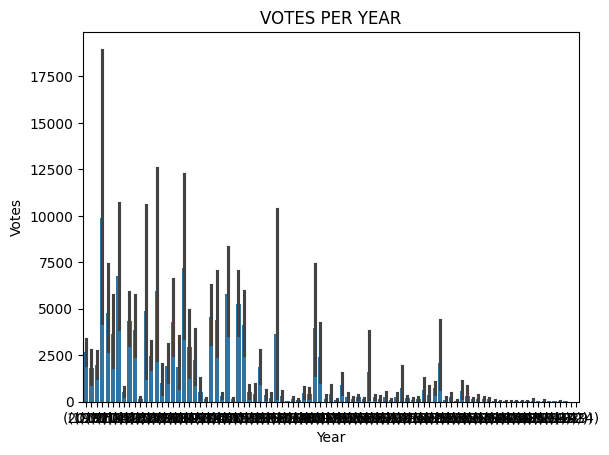

In [106]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("VOTES PER YEAR")
plt.show()

In [107]:
# in which year there was highest average revenue ?
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [109]:
# finding the average rating of each director
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)



,Rating
Director,
Saif Ali Sayeed,10.0
Sriram Raja,9.7
Munni Pankaj,9.4
Suhrud Godbole,9.4
Arvind Pratap,9.4
...,...
Umesh Ghadge,1.9
Raajeev Walia,1.8
Stanley D'Costa,1.8


In [113]:
# top 10 lengthy movies title and runtime
top10_lens = data.nlargest(10,'Duration')[['Name','Duration']]

In [114]:
top10_lens

,Name,Duration
4902,Gangs of Wasseypur,321
1345,Athidhi,300
8251,LOC: Kargil,255
14854,Vidhyaarthi: The Power of Students,250
6553,Janwar,247
490,Aasma: The Sky Is the Limit,240
14809,Veera,240
14938,Vivekananda,240
12365,Sangam,238
13713,Taj Mahal: A Monument of Love,235


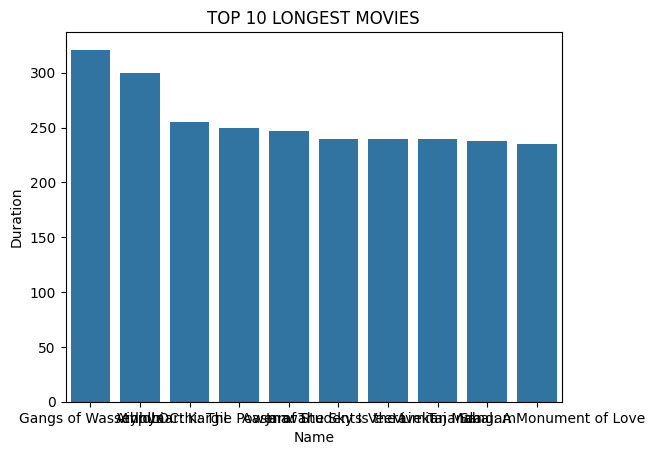

In [115]:
sns.barplot(x='Name',y='Duration',data=top10_lens)
plt.title("TOP 10 LONGEST MOVIES")
plt.show()

In [117]:
# display number of movies per year
data['Year'].value_counts()

,count
Year,
(2019),227
(2017),211
(2018),202
(2015),177
(2016),173
...,...
(1931),2
(1934),2
(1939),2


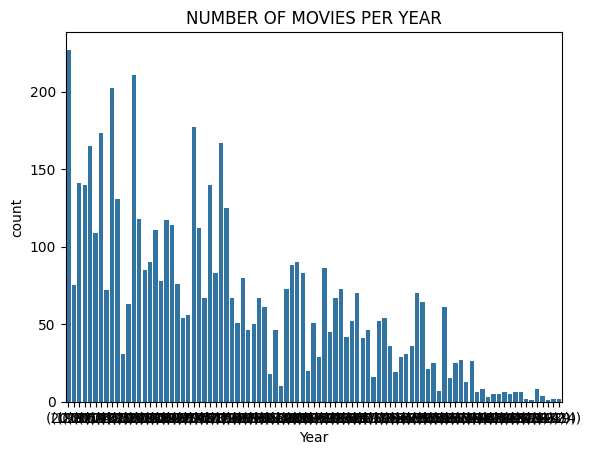

In [118]:
sns.countplot(x='Year',data=data)
plt.title("NUMBER OF MOVIES PER YEAR")
plt.show()

In [121]:
# displaying top10 highest movies
top10_lens = data.nlargest(10,'Rating')[['Name','Rating','Director']].set_index('Name')

In [122]:
top10_lens

,Rating,Director
Name,,
Love Qubool Hai,10.0,Saif Ali Sayeed
Half Songs,9.7,Sriram Raja
Gho Gho Rani,9.4,Munni Pankaj
June,9.4,Suhrud Godbole
The Reluctant Crime,9.4,Arvind Pratap
Ashok Vatika,9.3,Rahul Mallick
Baikunth,9.3,Vishwa Bhanu
God of gods,9.3,Venkatesh Bk
Love Sorries,9.3,Gautam Joshi


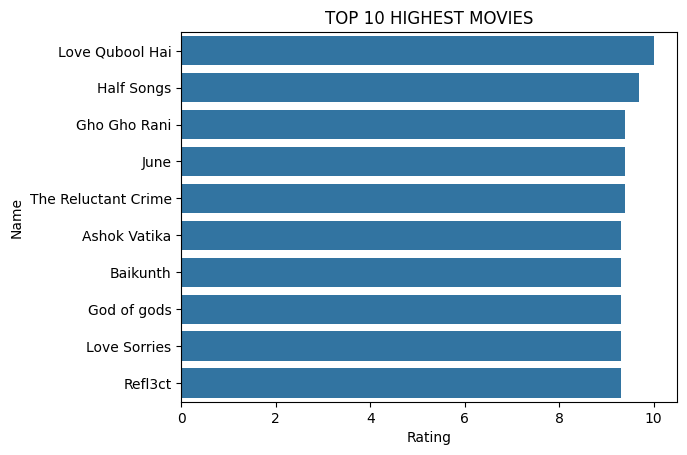

In [123]:
sns.barplot(x='Rating',y=top10_lens.index,data=top10_lens)
plt.title("TOP 10 HIGHEST MOVIES")
plt.show()

In [124]:
# does movie rating affect the moviea?
def rating (rating):
  if rating >= 7.0:
    return "Excellent"
  elif rating >= 6.0:
    return "Good"
  else :
    return "Average"


In [125]:
data ['rating_category'] = data['Rating'].apply(rating)


In [126]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,rating_category
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Excellent
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Average
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Excellent
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Average


In [127]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,rating_category
15493,Zubaan,(2015),115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Good
15494,Zubeidaa,(2001),153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Good
15503,Zulm Ki Zanjeer,(1989),125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Average
15505,Zulmi,(1999),129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Average
15508,Zulm-O-Sitam,(1998),130,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,Good


In [129]:
# how many films of each genre were made ?
one_d = []
for i in data['Genre']:
  for j in i.split(','):
    one_d.append(j)

In [130]:
one_d

['Drama',
 'Comedy',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Romance',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Comedy',
 ' Horror',
 'Drama',
 ' Horror',
 ' Mystery',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Adventure',
 ' Horror',
 ' Mystery',
 'Action',
 ' Crime',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Action',
 ' Sci-Fi',
 'Crime',
 ' Mystery',
 ' Thriller',
 'Comedy',
 'Thriller',
 'Drama',
 ' History',
 'Sport',
 'Biography',
 ' Drama',
 ' History',
 'D

In [131]:
from collections import Counter

In [132]:
Counter(one_d)

Counter({'Drama': 1842,
         'Comedy': 989,
         ' Romance': 1221,
         ' Drama': 1954,
         ' Musical': 322,
         ' War': 30,
         'Horror': 128,
         ' Mystery': 245,
         ' Thriller': 590,
         'Action': 1652,
         ' Crime': 604,
         'Crime': 271,
         ' Horror': 74,
         ' History': 91,
         'Thriller': 89,
         'Adventure': 105,
         ' Sci-Fi': 28,
         'Sport': 2,
         'Biography': 84,
         ' Family': 364,
         ' Comedy': 355,
         ' Adventure': 172,
         ' Fantasy': 115,
         'Documentary': 48,
         ' Biography': 31,
         'Mystery': 59,
         'Musical': 90,
         'Romance': 159,
         'Fantasy': 31,
         ' Music': 50,
         'Sci-Fi': 4,
         'Family': 52,
         'History': 8,
         ' Sport': 38,
         'Animation': 40,
         ' Action': 34,
         'War': 3,
         ' News': 1,
         'Music': 3,
         ' Western': 1})